# Practical Lab: Week 4

Note: This practical session is based on the exercises in section 3.6.1 e 3.6.2.


# Lab Exercise 4: Simple and Multiple Linear Regression
In this lab, we will learn how to perform simple and multiple linear regression on a dataset.
We will start with a simple linear regression model and then extend it to a multiple regression model.
Our focus will be on understanding how the models are built and interpreted.

---
## Step 1: Loading the Dataset
The first step is to load the dataset and explore its structure. This will help us understand what variables are available and how they might relate to each other.



## Step 2: Exploratory Data Analysis (EDA)
In this step, we will explore the relationship between the variables using scatter plots. Scatter plots can help us visualize whether a linear relationship might exist between two variables.



### What is Simple Linear Regression?

Simple linear regression is a method used to model the relationship between two variables by fitting a linear equation to observed data.
- The variable we are predicting is called the **dependent variable** (or response variable, `Y`).
- The variable we use to make predictions is called the **independent variable** (or predictor variable, `X`).

In this case, we are using horsepower as our independent variable (X) and mpg (miles per gallon) as our dependent variable (Y).

The goal is to find the **best-fit line** for the data. This line minimizes the sum of the squared differences between the observed values and the predicted values. This is known as **least squares regression**.

---

#### What does the regression output mean?

- **Intercept**: The value of Y when X is zero. This is the point where the line crosses the Y-axis.
- **Slope (Coefficient)**: The amount by which Y changes for a unit increase in X.
- **R-squared**: This tells us how well the model explains the variability in the data. A higher R-squared value (closer to 1) indicates a better fit.
- **p-value**: Helps determine whether the relationship between X and Y is statistically significant.



## Step 3: Performing Simple Linear Regression
Now, we will perform a simple linear regression. A simple linear regression model examines the relationship between two variables: one independent variable (predictor) and one dependent variable (response).
We will use the least squares method to fit the best line to the data.


First, let's install the packages that we will use in this lab

For these exercises we use the numpy library in version 1.22, which is compatible with the ISLP library.

In [ ]:
# !pip install --force-reinstall -v "numpy==1.22"
!pip install ISLP


### Step-by-step breakdown of the code
In this section, we calculate the regression line using the `results.params` output.
- `results.params[0]` is the **intercept** of the regression line.
- `results.params[1]` is the **slope** of the regression line.

These parameters are used to create the equation of the regression line: `Y = slope * X + intercept`.

Next, we calculate the predicted values of Y using the boundary values of X (`xlim`). The predicted Y values are stored in the `ylim` variable.

Finally, we use `ax.plot()` to plot the regression line on the scatter plot, which gives us a visual representation of how well the line fits the data.

---
Take note of the following:
- A good fit is when the points are close to the line.
- Large deviations from the line indicate that the model might not be capturing the true relationship between the variables.


In [ ]:
!pip install pandas


## Step 4: Interpreting the Regression Coefficients
After performing the regression, we will interpret the coefficients. The regression coefficients give us information about the relationship between the independent and dependent variables.
The intercept tells us the expected value of the dependent variable when the independent variable is 0. The slope tells us how much the dependent variable changes for a one-unit change in the independent variable.


If you are using Google Colab, after installing the above packages, restart the terminal.


### Step 6: What are Diagnostic Plots?

Diagnostic plots help us evaluate the quality of the regression model. We will look at the following types of plots:

1. **Residual Plot**: This shows the difference between the observed values and the predicted values. A good fit should show random scatter around zero, with no obvious pattern.
2. **Normal Q-Q Plot**: This plot checks if the residuals (errors) follow a normal distribution. If the points lie on a straight line, the residuals are normally distributed.
3. **Leverage Plot**: This helps identify influential points (outliers) that have a strong effect on the model.

The analysis of these plots can determine if the assumptions of the linear regression model are violated. For example, if the residuals are not normally distributed or show a clear pattern, this indicates a problem with the model.

---

As you create the diagnostic plots, keep in mind the following:
- **Homoscedasticity**: Residuals should have constant variance (not increasing or decreasing systematically).
- **Linearity**: The relationship between X and Y should be linear.
- **Normality of Residuals**: The residuals should follow a normal distribution.

Let’s now proceed to create these plots.



## Step 5: Plotting the Regression Line
To better understand the relationship, we can plot the regression line on top of the scatter plot. This allows us to visualize how well the model fits the data.


## Part I: Simple Linear Regression

Imports of pandas, numpy, matplotlib and ISLP (responsible for the dataset)


## Step 6: Diagnostic Plots
Finally, we will produce some diagnostic plots to assess the quality of the regression fit. Diagnostic plots help us identify potential problems with the model, such as non-linearity, unequal variance (heteroscedasticity), or outliers.


In [ ]:
import numpy as np
import pandas as pd
from ISLP import load_data
from matplotlib.pyplot import subplots


### Interpreting the Summary Output

The summary output provides a detailed report on the regression analysis:

- **R-squared**: This tells us how much of the variation in the dependent variable is explained by the independent variable.
  - An R-squared value of 0.544 means that 54.4% of the variability in the dependent variable (mpg) can be explained by horsepower.
  
- **p-value**: The p-value tells us whether the relationship between the variables is statistically significant.
  - A very small p-value (usually < 0.05) means that there is a significant relationship between the variables.

- **F-statistic**: This measures the overall significance of the regression model. A high F-statistic suggests that the model is statistically significant.

We will cover these metrics in more detail in class.


Also start the statsmodels library in which we use linear regression tuning for this exercise.

In [ ]:
import statsmodels.api as sm
from ISLP.models import (ModelSpec, summarize , poly)

1 - Instantiate of "Boston" dataframe contained in the ISL library

In [ ]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

Features descriptions:

*   lstat - percent of households with low socioeconomic status
*   medv - median house value




2 - Create a scatterplot that relates `lstat` and `medv`

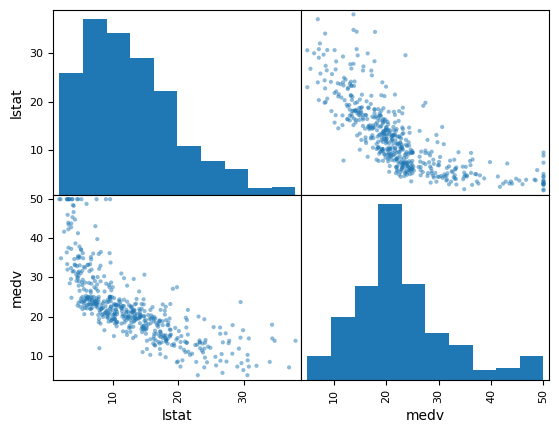

In [ ]:
pd.plotting.scatter_matrix(Boston[['lstat','medv']]);

3 - Did we notice any relationship from analyzing the plots you just produced?

We will build a regression model to predict medv using lstat:

3 - Create a dataframe(X) with two columns:

intercept: with all values equal to 1 use `np.ones()`;

lstat: Column with lstat values

In [ ]:
X = pd.DataFrame({'intercept': np.ones(len(Boston)), 'lstat': Boston['lstat']})

X.head(4)

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


4 - Create a vector (y) that corresponds to the medv values

In [ ]:
y = Boston['medv']

5 - Use `sm.OLS` to create a model and the regression

In [ ]:
model = sm.OLS(y, X) # OLS: Ordinary Least Squares
results = model.fit()

6 - Use summarize() to present the values and interpret them

In [ ]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


7 - Using MS (`ModelSpec()`) from the sm library, create a transform object from lstat, and then a pair of methods `transform()` and `fit()` are used to construct a corresponding model matrix.

In [ ]:
design = ModelSpec(['lstat'])
design

ModelSpec(terms=['lstat'])

In [ ]:
design = design.fit(Boston)
design

ModelSpec(terms=['lstat'])

In [ ]:

X = design.transform(Boston)

X[:4]


,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


8 - Use `sm.OLS` to create a model and regression that relates y and X

In [ ]:
model = sm.OLS(y, X)
results = model.fit()

9 - Use `.summary()` to present the model results.  

**NOTE**. The firs time you work on this practical you can skip this question. The reason is that most of what you will see here are metrics of how well the best line found fits the data. We will study this in class before you revisit this exercise.

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           5.08e-88
Time:                        06:35:07   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

10 - Use `.params` to display the model results.

**Note**. The first time you work on this practical this is what you should focus on.

In [ ]:
results.params

,0
intercept,34.553841
lstat,-0.950049


So we created a model. Now let's try to predict the values of medv given a value of lstat.

11 - Create a new dataframe with the target values `'lstat':[5, 10, 15]`. Use `transform()`.



In [ ]:
newX = pd.DataFrame({'intercept':[1.0,1.0,1.0],'lstat':[5, 10, 15]})
# newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


12 - Using the `get_prediction()` function, obtain the expected values for medv

In [ ]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

13 - Above we present the mean values. Now present the confidence interval and prediction intervals for each prediction (95%).

In [ ]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

14 - Explain the results above

For instance, the 95% confidence interval associated with an lstat value of 10 is (24.47, 25.63), and the 95% prediction interval is (12.82, 37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

15 - Draw the model line

(-0.0820000000000003, 39.782)


<ipython-input-37-ff41cf713063>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ylim = [results.params[1] * xlim[0] + results.params[0], results.params[1] * xlim[1] + results.params[0]]


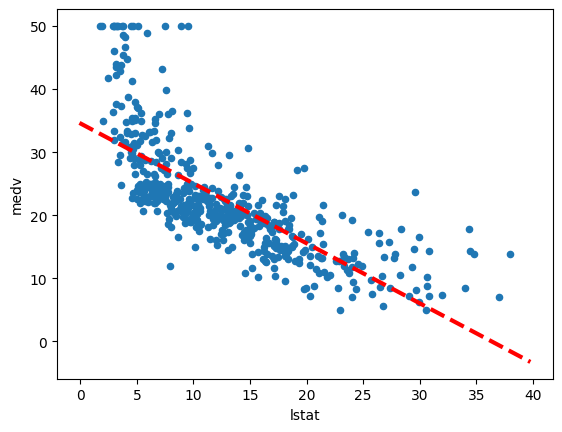

In [ ]:
#cria-se um scatter com todos os pontos de lstat e medv
ax = Boston.plot.scatter('lstat', 'medv')

#obten-se os valores limites para x
xlim = ax.get_xlim()
print(xlim)

#com base nos valores linite de x calcula um para para y usando o fator extraido da regressao
#Y = Beta0*X+Beta1 + error
ylim = [results.params[1] * xlim[0] + results.params[0], results.params[1] * xlim[1] + results.params[0]]

ax.plot(xlim, ylim, 'r--', linewidth=3)


16 - Make a scatter plot of the fitted values and residual values

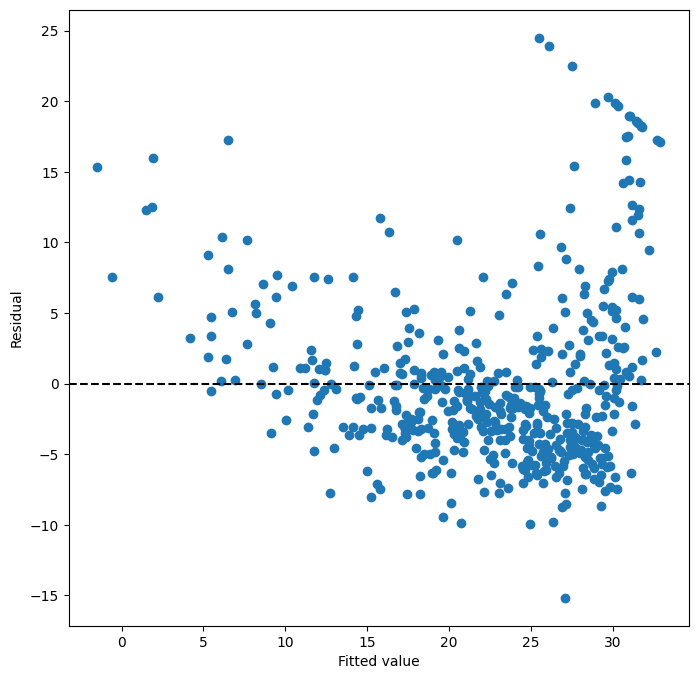

In [ ]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

16 - Make a graphical representation of the hat matrix

374

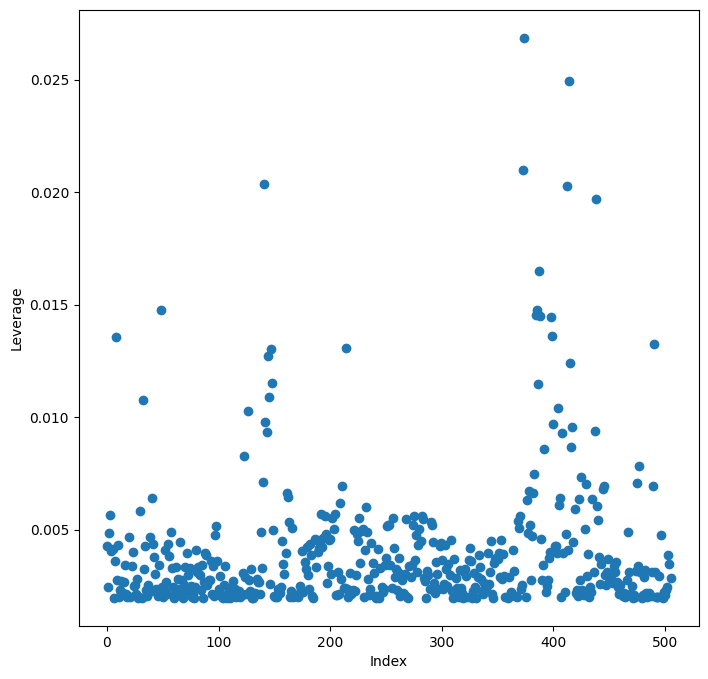

In [ ]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

## Part II

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
Auto = pd.read_csv("./Auto.csv")

1 - Use the `sm.OLS(`) function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output.

In [ ]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# from pandas.core.arrays.categorical import NoNewAttributesMixin
# missing data in horsepower
Auto = Auto.drop([32,126,330,336,354]).reset_index()

In [ ]:
Auto['horsepower'] = Auto['horsepower'].astype(int)

In [ ]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    int64  
 9   name          392 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB


In [ ]:
design = ModelSpec(['horsepower'])

design = design.fit(Auto)
X = design.transform(Auto)

# X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
#                   'horsepower': Auto['horsepower'].astype('int')})

X.head(4)


len(X)

392

In [ ]:
y = Auto['mpg']
len(y)

# np.asarray(X)

392

In [ ]:
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        06:39:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.0

In [ ]:
# Residual Standard Error of the model
np.sqrt(results.scale)

4.90575691954594

2 - Is there a relationship between the predictor and the response?

In [ ]:
#Yes, Inversely proportional relationship

3 - How strong is the relationship between the predictor and the response?

In [ ]:
# P-value =0 strong relation

4 - Is the relationship between the predictor and the response positive or negative?

In [ ]:
#negative based on signal of Beta1

5 - What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [ ]:
new_df = pd.DataFrame({'horsepower':[98]})
newX = design.transform(new_df)
newX

,intercept,horsepower
0,1.0,98


In [ ]:
new_predictions = results.get_prediction(newX)
print(new_predictions.predicted_mean)
print(new_predictions.conf_int(obs=True, alpha=0.05))

[24.46707715]
[[14.80939607 34.12475823]]


6 - Plot the response and the predictor in a new set of axes ax. Display the least squares regression line.

intercept     39.935861
horsepower    -0.157845
dtype: float64


<ipython-input-62-3ff74819760d>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ylim = [results.params[1] * xlim[0] + results.params[0], results.params[1] * xlim[1] + results.params[0]]


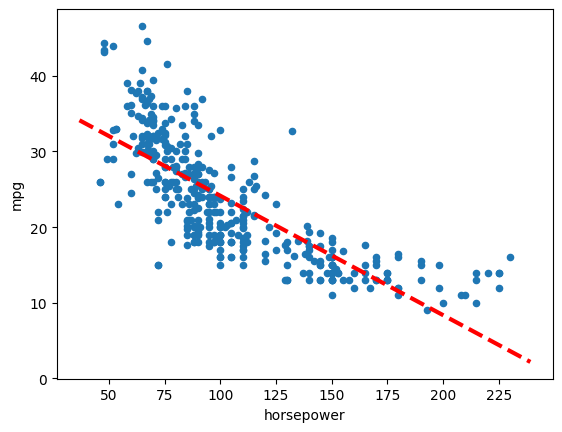

In [ ]:
#cria-se um scatter com todos os pontos de lstat e medv
ax = Auto.plot.scatter('horsepower','mpg')

#obten-se os valores limites para x
xlim = ax.get_xlim()
print(results.params)

#com base nos valores linite de x calcula um para para y usando o fator extraido da regressao
#Y = ax+b
ylim = [results.params[1] * xlim[0] + results.params[0], results.params[1] * xlim[1] + results.params[0]]

ax.plot(xlim, ylim, 'r--', linewidth=3)

7 - Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.